# Решение

In [1]:
!pip3 install rdkit

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv('data/train.csv', sep=',')
print(train)

                                                SMILES  activity
0                                                OCC=C       5.0
1       CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1      94.0
2                      COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1       5.4
3                                      CCCCC(CC)C(O)=O      -8.2
4    COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...      26.2
..                                                 ...       ...
754                               CC1=CC2=CC=CN=C2C=C1      43.1
755  C12CC[C@@](O)(C#C)[C@@]1(C)CCC3C4CCC(=O)C=C4CCC23      15.8
756                          CCCCNS(=O)(=O)C1=CC=CC=C1      17.8
757                     NC1=C(Cl)C(Cl)=NC(C(O)=O)=C1Cl      55.1
758  CCOC1=CC(OC2=CC=C(C=C2Cl)C(F)(F)F)=CC=C1[N+]([...      59.8

[759 rows x 2 columns]


### Анализ данных

In [6]:
display(train.head())

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
3,CCCCC(CC)C(O)=O,-8.2
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2


In [7]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    759 non-null    object 
 1   activity  759 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


None

In [8]:
from os.path import join 
from sklearn.neighbors import (KNeighborsRegressor, KNeighborsClassifier) 
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, accuracy_score) 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, LabelEncoder)  
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from PIL import Image

In [9]:
! pip install matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
! pip install seaborn
import seaborn as sns

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


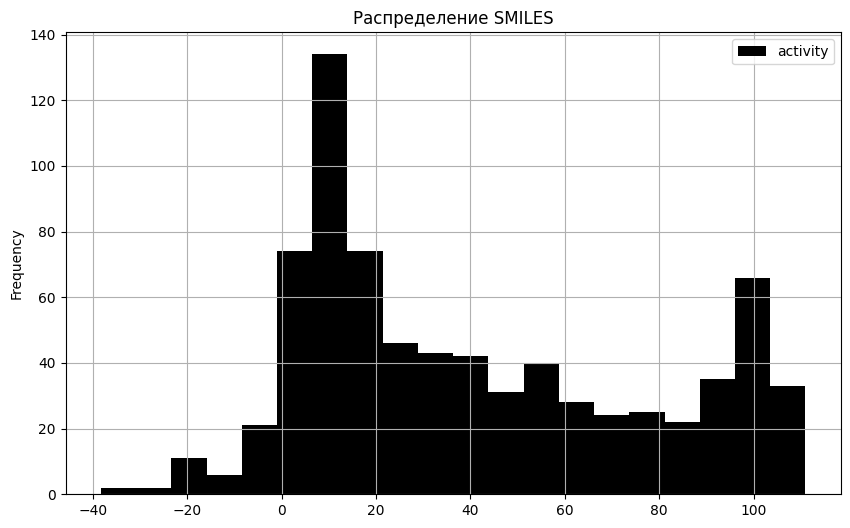

In [11]:
train.plot(
        kind='hist',
        figsize=(10, 6),
        title='Распределение SMILES',
        grid = True,
        color = 'black',
        bins=20
    );

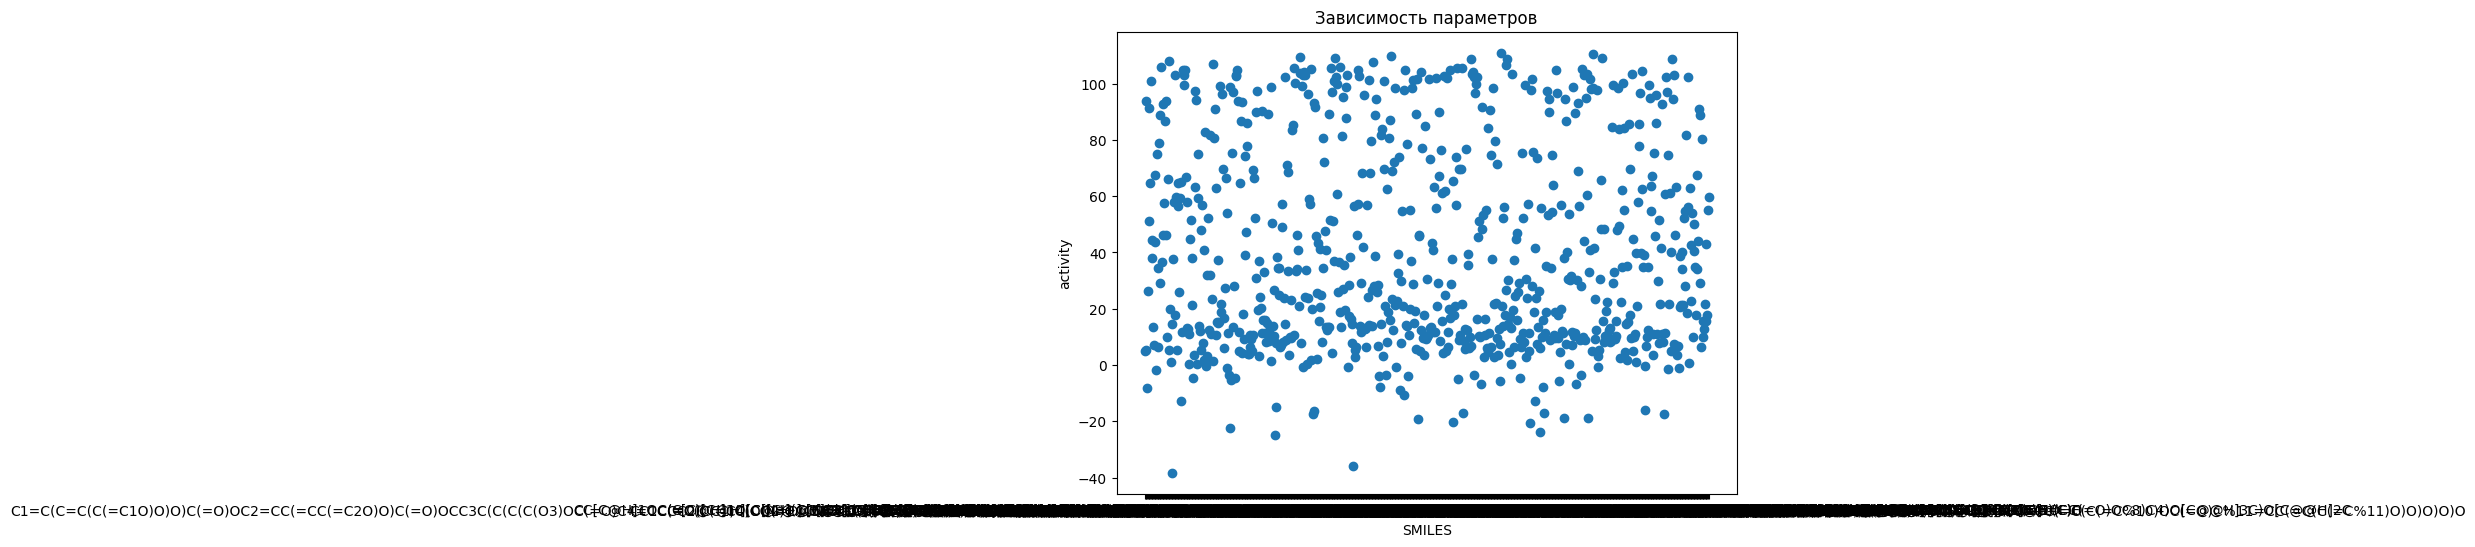

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(train['SMILES'], train['activity'])
plt.xlabel('SMILES')
plt.ylabel('activity')
plt.title('Зависимость параметров')
plt.show()

### Предобработка данных

In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [15]:
def smiles_to_fp(smiles):
    '''Convert SMILES to Morgan fingerprints'''
    return np.array([AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=1024) for s in smiles])

X_train = smiles_to_fp(train.SMILES)

[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerator
[14:14:16] DEPRECATION WARNING: please use MorganGenerat

In [27]:
#Оцениваем наличие или отсутствие пропусков в данных
train.isnull().sum() 

SMILES                0
activity              0
mol                   0
num_of_atoms          0
num_of_heavy_atoms    0
dtype: int64

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model = RandomForestRegressor()
model.fit(X_train, train.activity)

RandomForestRegressor()

In [19]:
#Method transforms smiles strings to mol rdkit object
train['mol'] = train['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 

#Now let's see what we've got
print(type(train['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


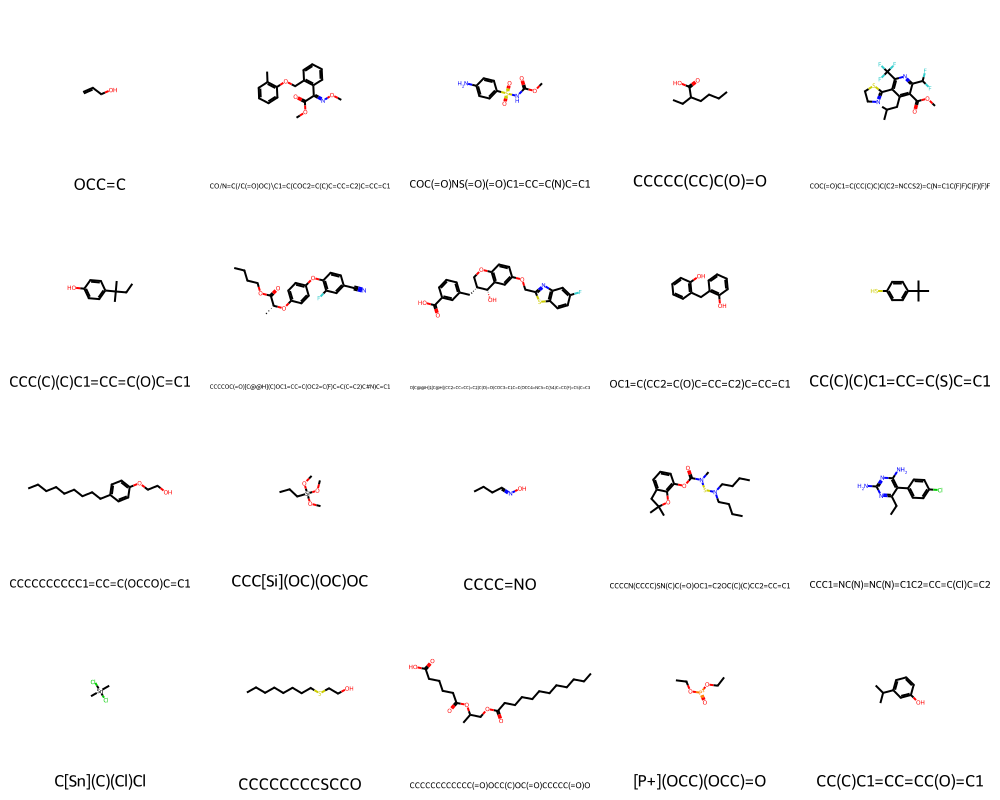

In [21]:
from rdkit.Chem import Draw
mols = train['mol'][:20]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(train['SMILES'][:20].values))

In [23]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1


train['mol'] = train['mol'].apply(lambda x: Chem.AddHs(x))
train['num_of_atoms'] = train['mol'].apply(lambda x: x.GetNumAtoms())
train['num_of_heavy_atoms'] = train['mol'].apply(lambda x: x.GetNumHeavyAtoms())

In [48]:
import seaborn as sns
sns.jointplot(train.num_of_atoms, train.activity)
jointplot.show()

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

In [29]:
# First we need to settle the pattern.
c_patt = Chem.MolFromSmiles('C')

# Now let's implement GetSubstructMatches() method
print(train['mol'][0].GetSubstructMatches(c_patt))

((1,), (2,), (3,))


In [30]:
#We're going to settle the function that searches patterns and use it for a list of most common atoms only
def number_of_atoms(atom_list, train):
    for i in atom_list:
        train['num_of_{}_atoms'.format(i)] = train['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], train)

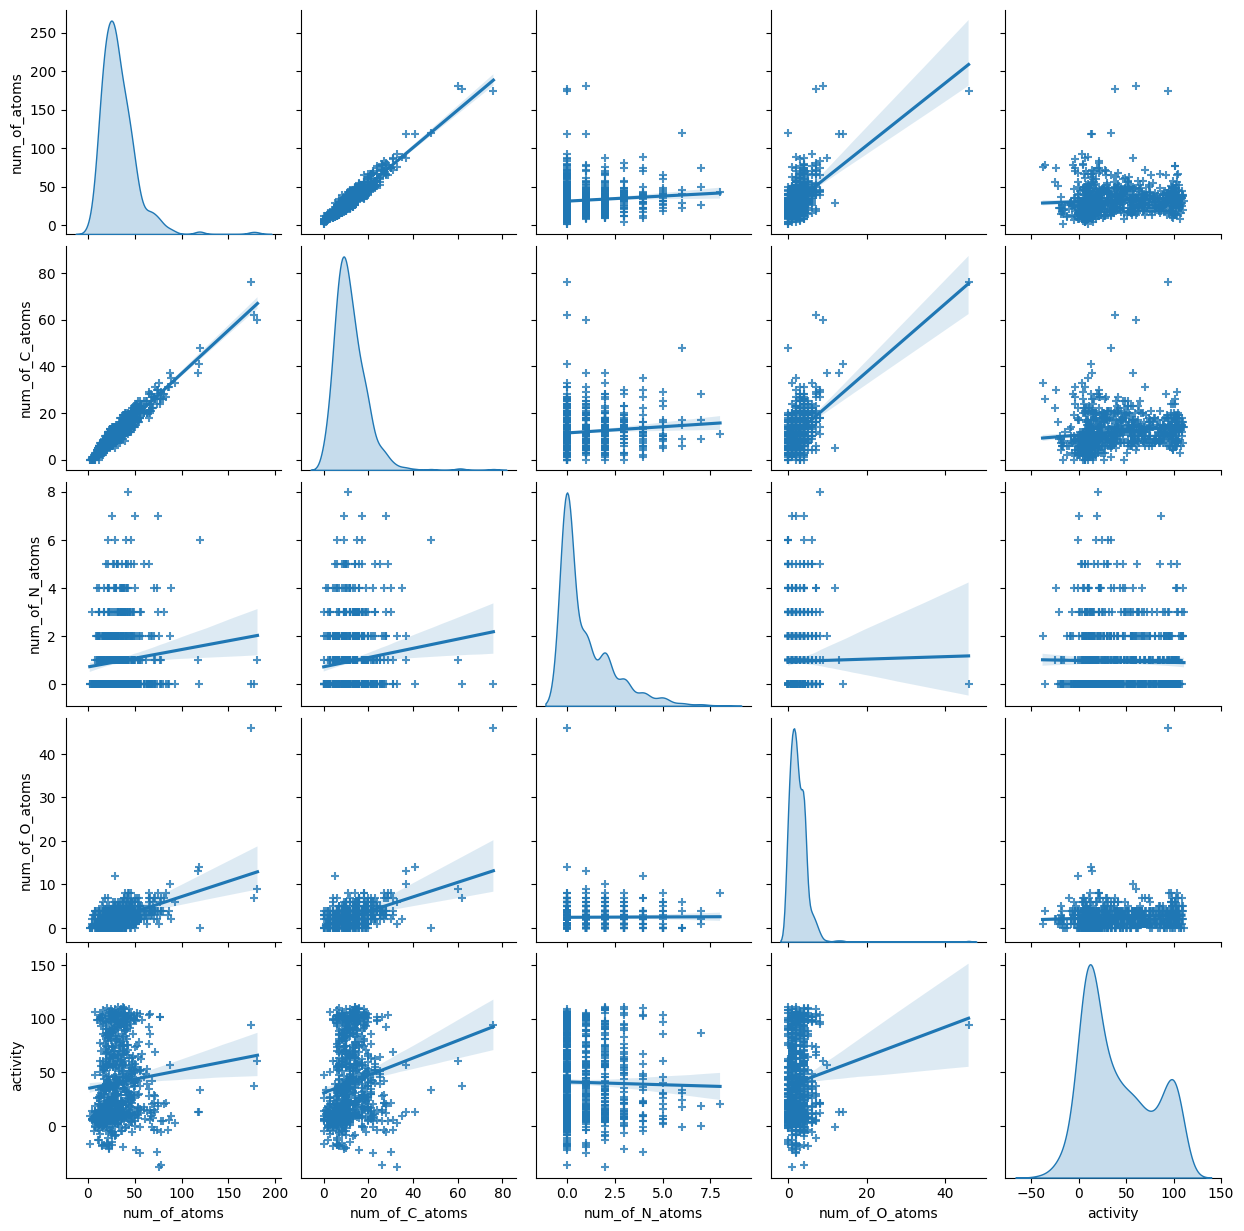

In [31]:
sns.pairplot(train[['num_of_atoms','num_of_C_atoms','num_of_N_atoms', 'num_of_O_atoms', 'activity']], diag_kind='kde', kind='reg', markers='+')
plt.show()

In [36]:
from sklearn.linear_model import RidgeCV

#Leave only features columns
train_df = train.drop(columns=['SMILES', 'mol', 'activity'])
y = train['activity'].values

print(train.columns)

#Perform a train-test split. We'll use 10% of the data to evaluate the model while training on 90%

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=.1, random_state=1)

Index(['SMILES', 'activity', 'mol', 'num_of_atoms', 'num_of_heavy_atoms',
       'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms',
       'num_of_Cl_atoms'],
      dtype='object')


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              759 non-null    object 
 1   activity            759 non-null    float64
 2   mol                 759 non-null    object 
 3   num_of_atoms        759 non-null    int64  
 4   num_of_heavy_atoms  759 non-null    int64  
 5   num_of_C_atoms      759 non-null    int64  
 6   num_of_O_atoms      759 non-null    int64  
 7   num_of_N_atoms      759 non-null    int64  
 8   num_of_Cl_atoms     759 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 53.5+ KB


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction[:300], "red", label="prediction", linewidth=1.0)
    plt.plot(y_test[:300], 'green', label="actual", linewidth=1.0)
    plt.legend()
    plt.ylabel('logP')
    plt.title("MAE {}, MSE {}".format(round(mae, 4), round(mse, 4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('MSE score:', round(mse,4))

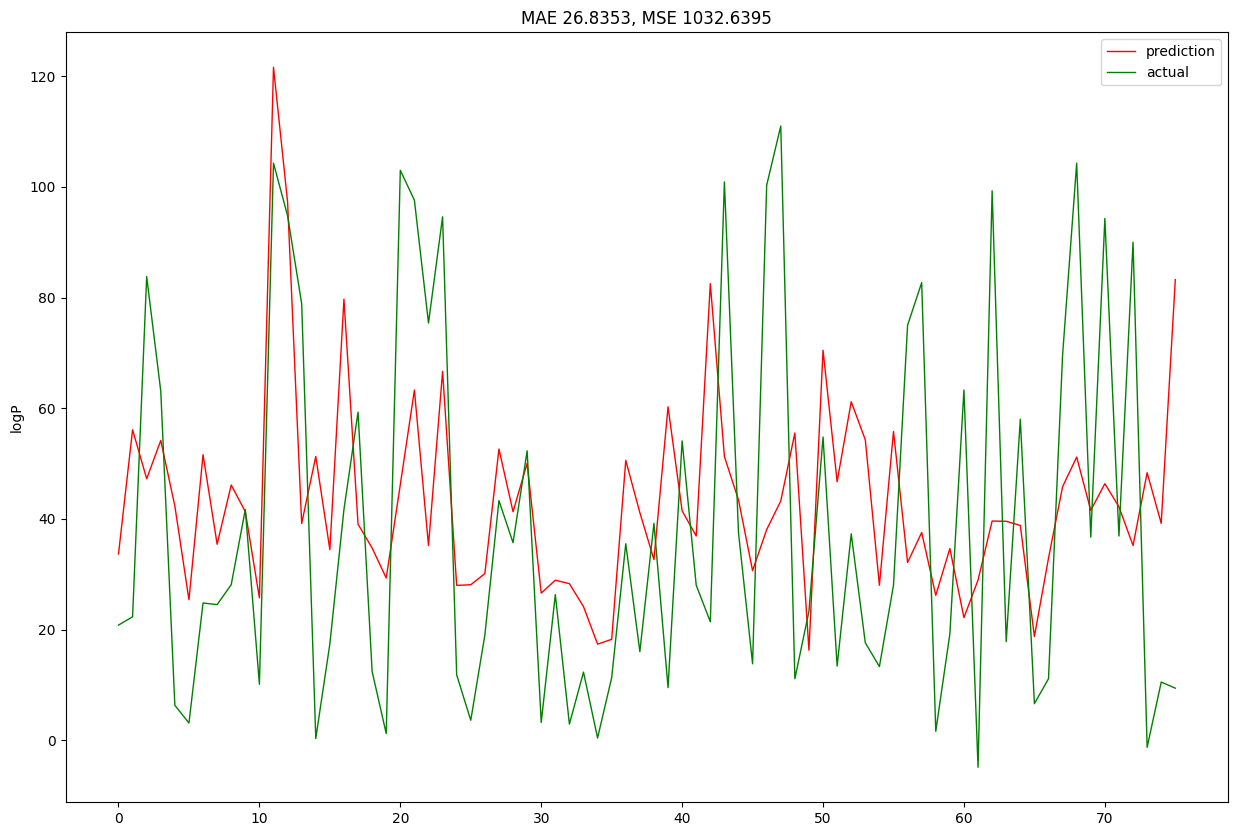

MAE score: 26.8353
MSE score: 1032.6395


In [46]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Evaluate results and plot predictions
evaluation(ridge, X_test, y_test)

In [41]:
atp = Chem.MolFromSmiles('C1=NC2=C(C(=N1)N)N=CN2[C@H]3[C@@H]([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O')

# Getting number of rings with specified number of backbones
print('Number of rings with 1 backbone:', atp.GetRingInfo().NumAtomRings(1))
print('Number of rings with 2 backbones:', atp.GetRingInfo().NumAtomRings(2))

Number of rings with 1 backbone: 1
Number of rings with 2 backbones: 2


In [42]:
m = Chem.MolFromSmiles('C(=O)C(=N)CCl')
#Iterating through atoms to get atom symbols and explicit valencies 
for atom in m.GetAtoms():
    print('Atom:', atom.GetSymbol(), 'Valence:', atom.GetExplicitValence())

Atom: C Valence: 3
Atom: O Valence: 2
Atom: C Valence: 4
Atom: N Valence: 2
Atom: C Valence: 2
Atom: Cl Valence: 1


In [43]:
from rdkit.Chem import Descriptors
train['tpsa'] = train['mol'].apply(lambda x: Descriptors.TPSA(x))
train['mol_w'] = train['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
train['num_valence_electrons'] = train['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
train['num_heteroatoms'] = train['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [44]:
train_df = train.drop(columns=['SMILES', 'mol', 'activity'])
y = train['activity'].values

print(train_df.columns)

#Perform a train-test split. We'll use 10% of the data to evaluate the model while training on 90%

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'tpsa', 'mol_w',
       'num_valence_electrons', 'num_heteroatoms'],
      dtype='object')


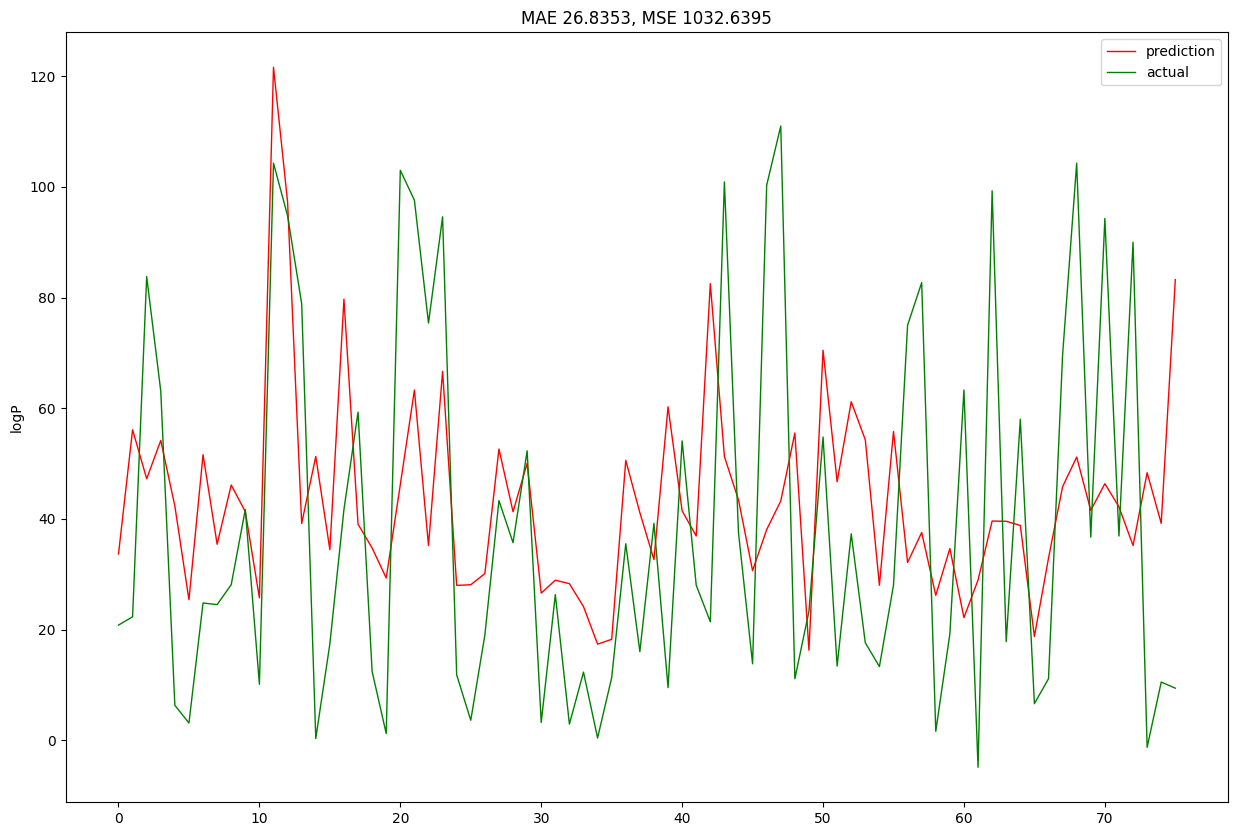

MAE score: 26.8353
MSE score: 1032.6395


In [45]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Evaluate results and plot predictions
evaluation(ridge, X_test, y_test)